#  Talking to the Trees:  How to Interpret a Decision Forest

## Eric Hullander

<figure>
      <img src = 'https://poetkatehutchinson.files.wordpress.com/2012/09/treebeard1.jpg' >
  <figcaption>“Side? I am on nobody's side, because nobody is on my side, little orc.”  - Treebeard</figcaption>
</figure>

Given a dataset and a target variable, there are many methods for finding a mapping (model) between the dataset and the target variable, and in the discipline of machine learning this process is called ‘supervised learning’.  There are two types of supervised learning, regression when our target is numerical, and classification when our target variable is categorical. Among these, there are many types of learners and each learner has its own set of strengths and weaknesses. Some attributes we would like our learner to have are: 

#### Qualities of a good Learner

-	Interpretability: Why did the model choose this result?  
-	Accuracy:   
    -	Are the predictions correct?   
    -	Do the results generalize to new data?  
-	Efficiency:   
    -	How long does it take to train this model?  
    -	Does it require lots of data  
-	Dimensionality:   
    -	Robust to Irrelevancy: Do we have to perform feature selection or reduce dimensionality to obtain a good model?  
    -	Robust to Collinearity: Will collinear variables compromise accuracy or interpretability?  
-	Robust to Scaling:  Will scaling or transforming the data affect the results?  

Unfortunately, we cannot always get everything we want, so when choosing a learner we must ask what kind of data we have and what questions we are trying to answer.

#### The decision trees have many of these qualities.  [1]

- Interpretability: We can see where splits are made 
- Accuracy: Decision trees are accurate on average (low bias), but highly dependent on the sample (high variance).  So they cannot be trusted on an individual basis
- Efficiency:  Greedy algorithm is O(C n log n) where C are number of features and n are number of samples.
- Robust to Dimensionality:  Dimensionality does not compromise accuracy
- Robust to Irrelevancy: Trees perform automatic feature selection based on GINI impurity or information gain.  Irrelevant features just aren’t used
- Robust to Collinearity: If two variables are collinear, the can use one or the other making one of the two unimportant to the model when they are equally important
- Robust to Scaling:  Scaling and many transformations e.g. log(x) would not affect where the tree splits if using GINI impurity or information gain.



<img src = "http://i.stack.imgur.com/r7QFy.png" style="width:300px;height:300px">

The nice thing about trees are they are low bias on average, the problem with decision trees is that they are highly variable individually.  Looking at the upper right target in Fig. 1, imagine if these points were obtained by building different trees on different subsets Ni of a subset Mk of the data. Then if we just averaged all of the points together, for every point above or left-of-the-target there is another point below or right-of-the-target.  We would be left with a single point near the bullseye.  If we repeated for all k subsets of M, we should obtain a cluster of points very near the bullseye.  We would now have a model that is low bias and low variance.


In [426]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [427]:
#Calculate Expected Value of binomial distribution

$$\mu_X = E(X) = \sum\limits_{k=0}^{N}{n \choose x}p^k (1-p)^{(N-k)} \frac{k}{N}$$
$$\mu_X = p$$

In [428]:
from scipy.misc import comb

p = .7
tot = 0
N = 10
for k in range(N+1):
    tot += comb(N,k)*(p**k)*((1-p)**(N-k))*1.0*k/N
tot

0.69999999999999996

$$\mu_X = E(X) = \sum\limits_{k=0}^{N}{n \choose x}p^k (1-p)^{(N-k)} (\frac{k}{N} - p)^2$$

In [429]:
'''
[wins and losses example], 
number of wins, 
number of combinations, 
probability of number of wins, 
distance from mean'''
result = []

for N in range(1,50):
    tot = 0
    for k in range(N + 1):
        x = np.hstack((np.zeros(N-k), np.ones(k)))
        #print x, k, comb(N,k), ((p**k)*((1-p)**(N-k))), (1.0*k/N - p)
        tot += (comb(N,k)*((p**k)*((1-p)**(N-k))))*(1.0*k/N - p)**2
    result.append(tot)

'''
Alternatively
'''


 
Theorem. Suppose $$X_1, X_2, ... , X_n$$ are n independent random variables with means $$\mu_1,\mu_2,⋯,\mu_n $$and variances $$\sigma_1,\sigma_2,⋯,\sigma_n $$. 

Then, the mean and variance of the linear combination $$Y = \sum\limits_{i=1}^{n} a_i X_i$$, where a1, a2, ... , an are real constants are:

$$\mu_Y = \sum\limits_{i=1}^{n} a_i \mu_i$$and:

$$\sigma^2_Y = \sum\limits_{i=1}^{n} a^2_i \sigma^2_i$$

respectively.

In [430]:
# above equation, ai = 1/n, sigma is p*(1-p).  All factor out of summation.  Summation reduces to n
#becomes p*(1-p)/n
result2 = 1.0*p*(1-p)/np.array(range(1,50))

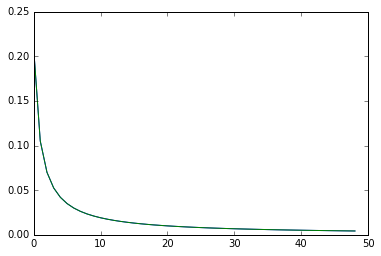

In [431]:
plt.plot(result)
plt.plot(result2)

In [423]:
p*(1-p)

0.21000000000000002